In [ ]:
pip install imbalanced-learn


In [ ]:
import pandas as pd

# 讀檔
lab_data = pd.read_csv('csv_data/lab_data 20240509-20240801.csv')
input_v4 = pd.read_csv('csv_data/input_v5.csv')
test = pd.read_csv('csv_data/test.csv')

# 1. 主鍵轉字串
lab_data['CNO'] = lab_data['CNO'].astype(str)
input_v4['CNO'] = input_v4['CNO'].astype(str)

# 2. TIME 欄位標準化
lab_data['TIME'] = pd.to_datetime(lab_data['TIME'], errors='coerce')
input_v4['TIME'] = pd.to_datetime(input_v4['TIME'], errors='coerce')

# 3. 統一格式（都轉成字串 'YYYY-MM-DD HH:MM:SS'）
lab_data['TIME'] = lab_data['TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')
input_v4['TIME'] = input_v4['TIME'].dt.strftime('%Y-%m-%d %H:%M:%S')
print('input_v4:',input_v4.shape)

# 4. 合併 file_name
file_map = lab_data[['CNO', 'TIME', 'file_name']].drop_duplicates()
input_v4_with_file = input_v4.merge(file_map, on=['CNO', 'TIME'], how='left')

# 5. 檢查 file_name 缺失
print('合併後 file_name 缺失數:', input_v4_with_file['file_name'].isna().sum(), '/', len(input_v4_with_file))
print(input_v4_with_file[['CNO','TIME','file_name']].head(10))
print('input_v4_with_file:',input_v4_with_file.shape)
# 6. 分割 train/test
test_file_names = test['file_name'].astype(str).unique()
print('test_file_names:',test_file_names.shape)
test_idx = input_v4_with_file['file_name'].isin(test_file_names)
# print('test_idx:',test_idx.head(10))
X_test = input_v4_with_file[test_idx]
X_train = input_v4_with_file[~test_idx]

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Test file_name example:', X_test['file_name'].unique()[:5])


input_v4: (4640, 22)
合併後 file_name 缺失數: 150 / 4653
     CNO                 TIME file_name
0   6588  2024-05-22 20:38:00       NaN
1  20791  2024-06-17 15:50:00       NaN
2  20791  2024-06-20 14:21:00       NaN
3  20912  2024-05-18 17:20:00       NaN
4  29218  2024-07-08 14:33:00       NaN
5  44693  2024-06-22 20:41:00       NaN
6  44693  2024-06-23 16:33:00       NaN
7  44693  2024-06-27 08:32:00       NaN
8  45652  2024-05-07 08:41:00       NaN
9  45652  2024-05-13 09:36:00       NaN
input_v4_with_file: (4653, 23)
test_file_names: (615,)
Train shape: (4186, 23)
Test shape: (467, 23)
Test file_name example: ['0100294190_001.jpg' '0107544336_001.jpg' '0100310935_001.jpg'
 '0100272898_001.jpg' '0100284654_001.jpg']


In [ ]:
set_test = set(test['file_name'].astype(str))
set_lab = set(lab_data['file_name'].astype(str))
set_v4 = set(input_v4_with_file['file_name'].astype(str))
print("交集數set_test & set_lab：", len(set_test & set_lab))
print("交集數set_v4 & set_lab：", len(set_v4 & set_lab))
print("交集數set_v4 & set_test：", len(set_v4 & set_test))
print("set_test：", len(set_test))
print("set_v4：", len(set_v4))
print("set_lab：", len(set_lab))

print("處裡過後整筆差異：", len(set_lab)-len(set_v4))
print("test_data數量差異：", len(set_test)- len(set_v4 & set_test))

交集數set_test & set_lab： 615
交集數set_v4 & set_lab： 4503
交集數set_v4 & set_test： 467
set_test： 615
set_v4： 4504
set_lab： 6141
處裡過後整筆差異： 1637
test_data數量差異： 148


Train shape: (4186, 23)
Test shape: (467, 23)
訓練資料集類別分布：
HOS  CNO      TIME                 AGE        GENDER  CRP    WBC_2  PLT_2  RDW_2  GLU_2  MCV..fL.  MCH..pg.  MCHC..g.dL.  RBC..10.6.uL.  Hb..g.dL.  RDW.SD..fL.  TYPE   ORGANISM              CLASS_1                       time[all-cause mortality]  event[all-cause mortality]  days_diff  file_name           has_bacteremia
801  1024717  2024-07-08 12:29:00  90.946439  1       12.67  11.78  42.0   16.9   94.0   88.4      29.5      33.3         3.19           9.4        50.4         Blood  candida parapsilosis  Fungus (Yeast)                211.0                      0.0                         8.0        0100422548_001.jpg  1                 1
              2024-07-10 15:16:00  90.952233  1       12.72  12.78  87.0   17.2   104.0  88.9      29.4      33.1         3.23           9.5        52.3         Blood  candida parapsilosis  Fungus (Yeast)                209.0                      0.0                         2.0        0100428838

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 All Features 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.7647 |
| Recall     | 0.3171 |
| F1-score   | 0.4483 |
| Accuracy   | 0.9315 |
| AUC        | 0.8368 |


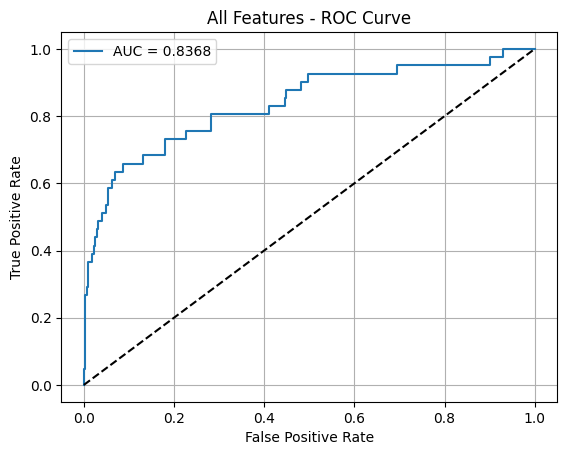

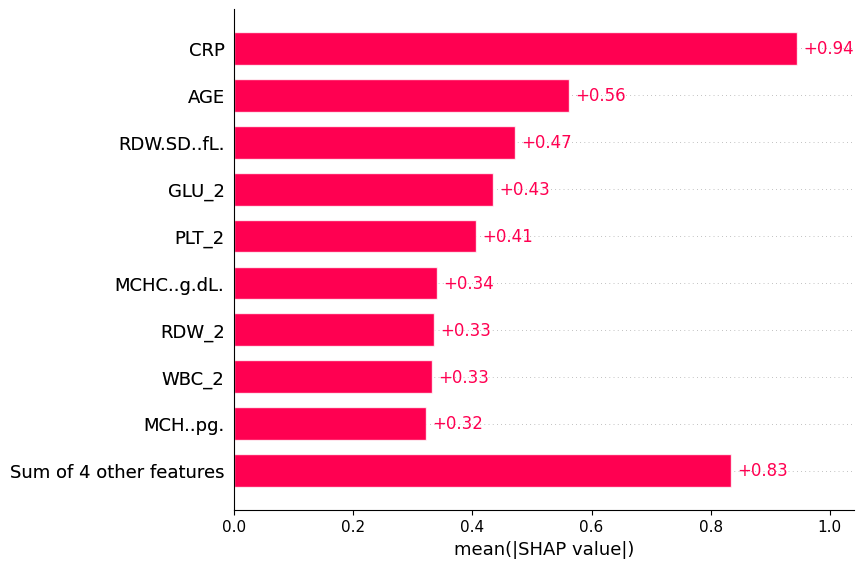

2b - three_featrues： ['CRP', 'AGE', 'RDW.SD..fL.']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 2b - three_featrues 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.7059 |
| Recall     | 0.2927 |
| F1-score   | 0.4138 |
| Accuracy   | 0.9272 |
| AUC        | 0.8364 |


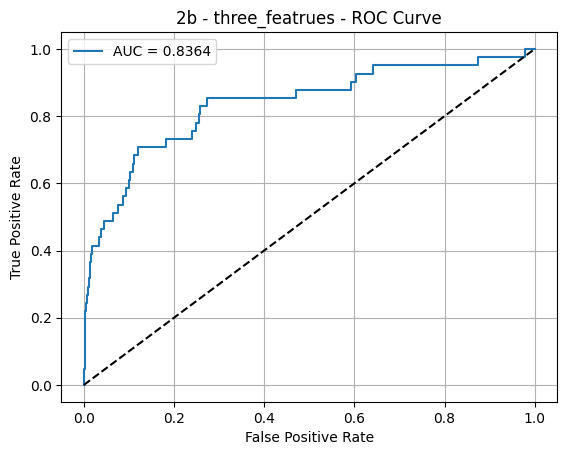

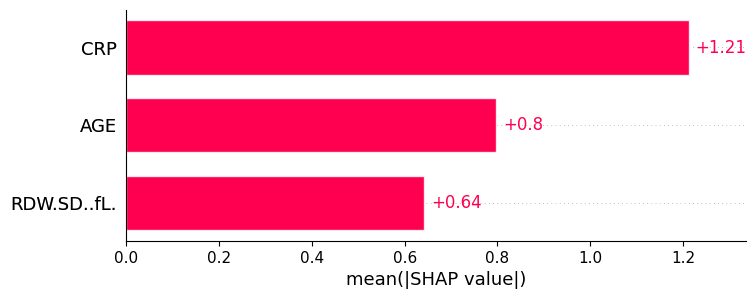

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import shap
from sklearn.preprocessing import LabelEncoder



# === 1. 檔案合併與 train/test 分割 ===
lab_data = pd.read_csv('csv_data/lab_data 20240509-20240801.csv')
input_v4 = pd.read_csv('csv_data/input_v5.csv')
test = pd.read_csv('csv_data/test.csv')

lab_data['CNO'] = lab_data['CNO'].astype(str)
input_v4['CNO'] = input_v4['CNO'].astype(str)
lab_data['TIME'] = pd.to_datetime(lab_data['TIME'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
input_v4['TIME'] = pd.to_datetime(input_v4['TIME'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

file_map = lab_data[['CNO', 'TIME', 'file_name']].drop_duplicates()
input_v4_with_file = input_v4.merge(file_map, on=['CNO', 'TIME'], how='left')

test_file_names = test['file_name'].astype(str).unique()
input_v4_with_file['file_name'] = input_v4_with_file['file_name'].astype(str).str.strip()
test_file_names = [fn.strip() for fn in test_file_names]

test_idx = input_v4_with_file['file_name'].isin(test_file_names)
X_test = input_v4_with_file[test_idx].copy()
X_train = input_v4_with_file[~test_idx].copy()

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)

# === 2. 特徵工程與預處理 ===
drop_cols = ['HOS', 'CNO', 'TIME', 'TYPE', 'ORGANISM', 'CLASS_1',
             'time[all-cause mortality]', 'event[all-cause mortality]', 'days_diff', 'file_name']
feature_cols = [col for col in X_train.columns if col not in drop_cols
                and not col.startswith("death_within") and col != "has_bacteremia"]

# 建立標籤
for df in [X_train, X_test]:
    df['has_bacteremia'] = ((df['TYPE'].str.lower() == 'blood') & df['ORGANISM'].notna()).astype(int)

for col in feature_cols:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        # 合併 train/test 保證一致編碼
        all_values = pd.concat([X_train[col], X_test[col]]).astype(str)
        le.fit(all_values)
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))

# 類別型欄位轉數字
for df in [X_train, X_test]:
    for col in X_train[feature_cols].select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))
    # df[feature_cols] = df[feature_cols].fillna(df[feature_cols].median())
    # 只對數值型欄位補中位數
    num_cols = df[feature_cols].select_dtypes(include=['number']).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())

    # 類別型欄位補 'missing'
    cat_cols = df[feature_cols].select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna('missing')


# === 3. 訓練與評估 ===
def train_and_evaluate(X_train, X_test, y_train, y_test, feature_cols, title=''):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train[feature_cols], y_train)
    y_pred = model.predict(X_test[feature_cols])
    y_proba = model.predict_proba(X_test[feature_cols])[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 {title} 評估結果:")
    print(f"| 指標       | 數值   |")
    print(f"|------------|--------|")
    print(f"| Precision  | {precision:.4f} |")
    print(f"| Recall     | {recall:.4f} |")
    print(f"| F1-score   | {f1:.4f} |")
    print(f"| Accuracy   | {accuracy:.4f} |")
    print(f"| AUC        | {auc:.4f} |")

    # ROC 曲線
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{title} - ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # SHAP 分析
    explainer = shap.Explainer(model, X_test[feature_cols])
    shap_values = explainer(X_test[feature_cols])
    shap.plots.bar(shap_values, max_display=10)

    return model, shap_values

# === 4. 執行訓練與評估 ===
y_train = X_train['has_bacteremia']
y_test = X_test['has_bacteremia']
print(f"訓練資料集類別分布：")
print(X_train.value_counts())
# 菌血症預測（全部特徵）
model, shap_values = train_and_evaluate(X_train, X_test, y_train, y_test, feature_cols, title='All Features')

# 找出前3個重要特徵
shap_sum2 = np.abs(shap_values.values).mean(axis=0)
top3_idx2 = np.argsort(shap_sum2)[-3:][::-1]
top3_features_2b = [feature_cols[i] for i in top3_idx2]
print("2b - three_featrues：", top3_features_2b)

# 2b. 菌血症預測（三特徵）
model_2b, _ = train_and_evaluate(X_train, X_test, y_train, y_test, top3_features_2b, title='2b - three_featrues')


📊【All Features】SMOTE 後訓練資料集類別分布：
has_bacteremia
0    3890
1    3890
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 All Features 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.5385 |
| Recall     | 0.5122 |
| F1-score   | 0.5250 |
| Accuracy   | 0.9186 |
| AUC        | 0.7979 |


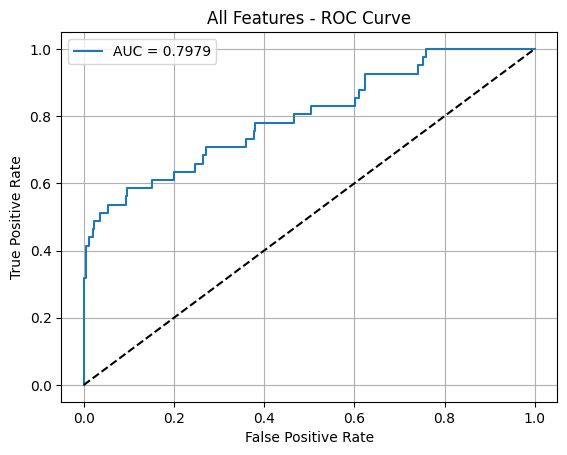

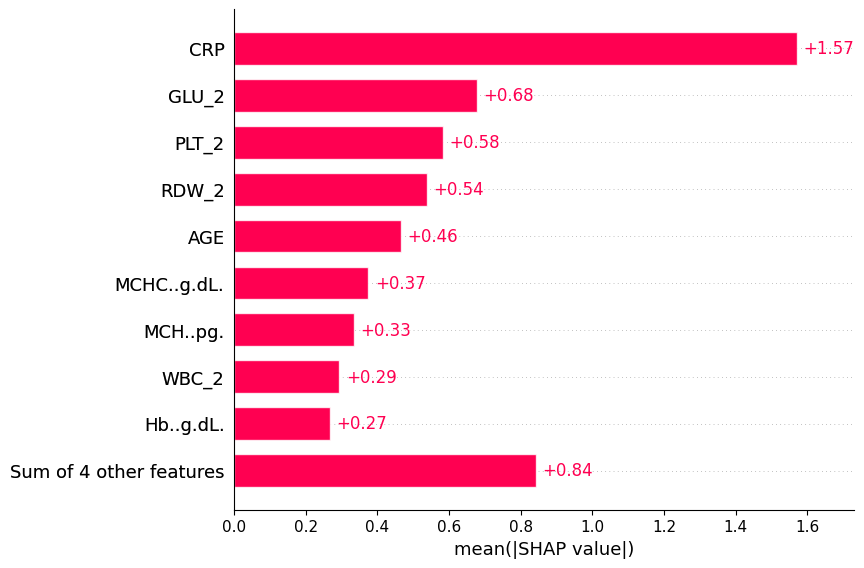

2b - three_featrues： ['CRP', 'GLU_2', 'PLT_2']

📊【2b - three_featrues】SMOTE 後訓練資料集類別分布：
has_bacteremia
0    3890
1    3890
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 2b - three_featrues 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.2062 |
| Recall     | 0.4878 |
| F1-score   | 0.2899 |
| Accuracy   | 0.7901 |
| AUC        | 0.7649 |


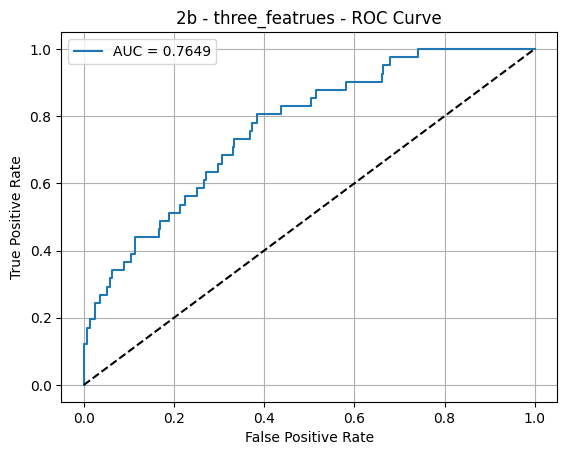

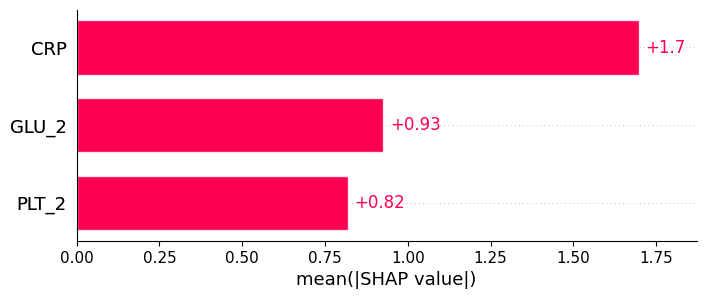

In [ ]:
def train_and_evaluate_smote(X_train, X_test, y_train, y_test, feature_cols, title=''):
    # SMOTE

    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print(f"\n📊【{title}】SMOTE 後訓練資料集類別分布：")
    print(y_train_res.value_counts())

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_res[feature_cols], y_train_res)
    y_pred = model.predict(X_test[feature_cols])
    y_proba = model.predict_proba(X_test[feature_cols])[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 {title} 評估結果:")
    print(f"| 指標       | 數值   |")
    print(f"|------------|--------|")
    print(f"| Precision  | {precision:.4f} |")
    print(f"| Recall     | {recall:.4f} |")
    print(f"| F1-score   | {f1:.4f} |")
    print(f"| Accuracy   | {accuracy:.4f} |")
    print(f"| AUC        | {auc:.4f} |")

    # ROC 曲線
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{title} - ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # SHAP 分析
    explainer = shap.Explainer(model, X_test[feature_cols])
    shap_values = explainer(X_test[feature_cols])
    shap.plots.bar(shap_values, max_display=10)

    return model, shap_values

# === 4. 執行訓練與評估 ===
# from imblearn.over_sampling import SMOTE

# 準備特徵與標籤
X_train_smote = X_train[feature_cols]
y_train = X_train['has_bacteremia']
y_test = X_test['has_bacteremia']

# 菌血症預測（全部特徵）
model_1, shap_values = train_and_evaluate_smote(X_train_smote, X_test, y_train , y_test, feature_cols, title='All Features')

# 找出前3個重要特徵
shap_sum2 = np.abs(shap_values.values).mean(axis=0)
top3_idx2 = np.argsort(shap_sum2)[-3:][::-1]
top3_features_2b = [feature_cols[i] for i in top3_idx2]
print("2b - three_featrues：", top3_features_2b)

# 2b. 菌血症預測（三特徵）
model_2b, _ = train_and_evaluate_smote(X_train_smote, X_test, y_train, y_test, top3_features_2b, title='2b - three_featrues')




📊【All Features】SMOTE 後訓練資料集類別分布：
has_bacteremia
0    3890
1     592
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:20:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 All Features 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.7000 |
| Recall     | 0.3415 |
| F1-score   | 0.4590 |
| Accuracy   | 0.9293 |
| AUC        | 0.8297 |


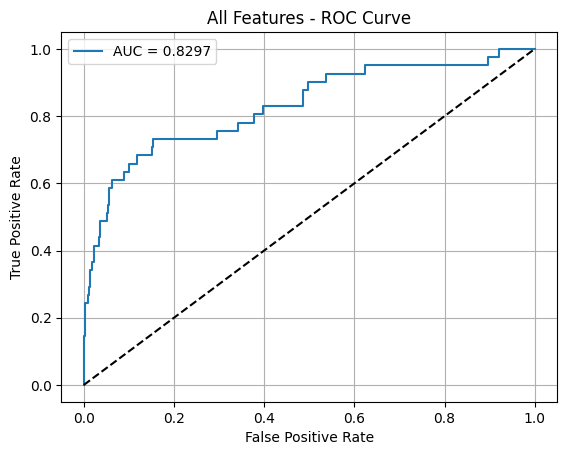

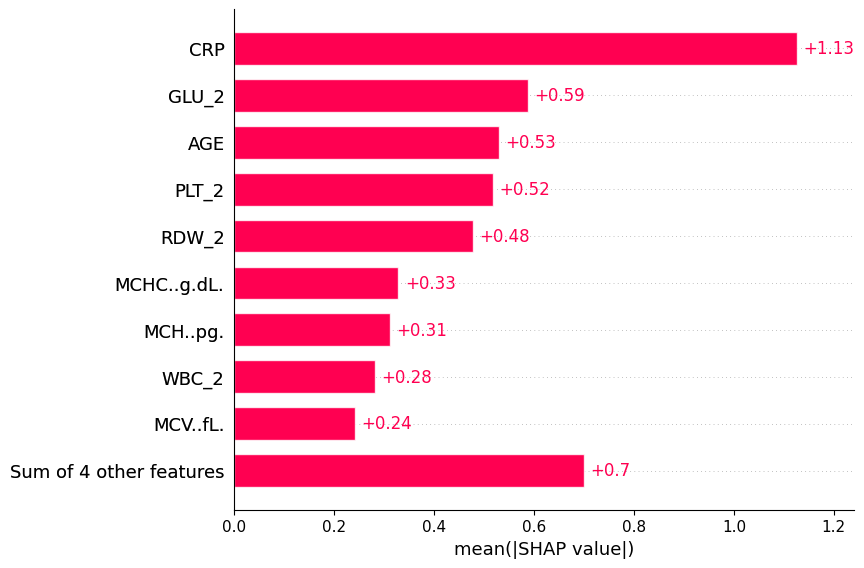

2b - three_featrues： ['CRP', 'GLU_2', 'AGE']

📊【2b - three_featrues】SMOTE 後訓練資料集類別分布：
has_bacteremia
0    3890
1     592
Name: count, dtype: int64

📊 2b - three_featrues 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.5676 |
| Recall     | 0.5122 |
| F1-score   | 0.5385 |
| Accuracy   | 0.9229 |
| AUC        | 0.8913 |


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:21:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


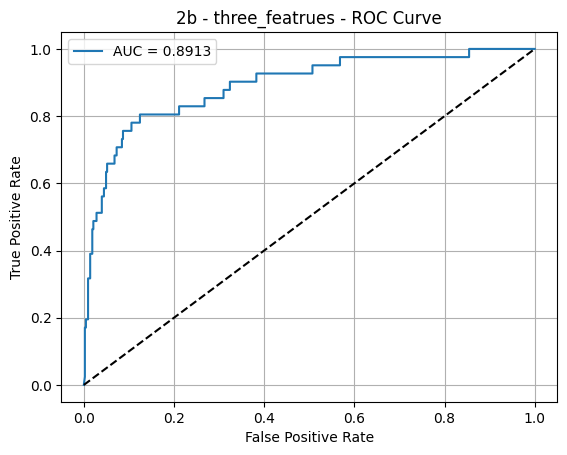

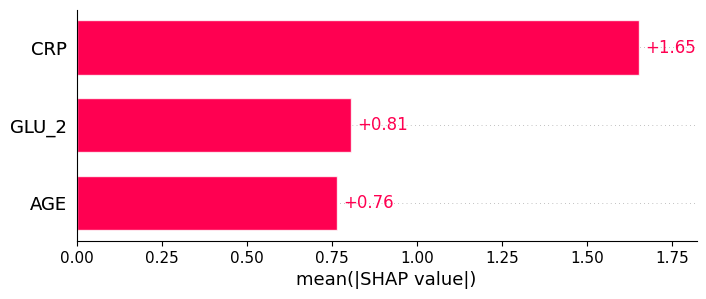

In [ ]:
def train_and_evaluate_smote_2(X_train, X_test, y_train, y_test, feature_cols, title=''):
    # SMOTE
    # 取得少數類別的比例
    minority_ratio = y_train.value_counts().min() / y_train.value_counts().max()

    # 想讓少數類別擴增成原本的兩倍（不是等量）
    desired_ratio = minority_ratio * 2

    # 限制不要超過1（最多與多數類別一樣）
    desired_ratio = min(desired_ratio, 1.0)

    # 設定 SMOTE 參數
    smote = SMOTE(sampling_strategy=desired_ratio, random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print(f"\n📊【{title}】SMOTE 後訓練資料集類別分布：")
    print(y_train_res.value_counts())

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_res[feature_cols], y_train_res)
    y_pred = model.predict(X_test[feature_cols])
    y_proba = model.predict_proba(X_test[feature_cols])[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 {title} 評估結果:")
    print(f"| 指標       | 數值   |")
    print(f"|------------|--------|")
    print(f"| Precision  | {precision:.4f} |")
    print(f"| Recall     | {recall:.4f} |")
    print(f"| F1-score   | {f1:.4f} |")
    print(f"| Accuracy   | {accuracy:.4f} |")
    print(f"| AUC        | {auc:.4f} |")

    # ROC 曲線
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{title} - ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # SHAP 分析
    explainer = shap.Explainer(model, X_test[feature_cols])
    shap_values = explainer(X_test[feature_cols])
    shap.plots.bar(shap_values, max_display=10)

    return model, shap_values

# === 4. 執行訓練與評估 ===
# from imblearn.over_sampling import SMOTE

# 準備特徵與標籤
X_train_smote = X_train[feature_cols]
y_train = X_train['has_bacteremia']
y_test = X_test['has_bacteremia']

# 菌血症預測（全部特徵）
model_2, shap_values = train_and_evaluate_smote_2(X_train_smote, X_test, y_train , y_test, feature_cols, title='All Features')

# 找出前3個重要特徵
shap_sum2 = np.abs(shap_values.values).mean(axis=0)
top3_idx2 = np.argsort(shap_sum2)[-3:][::-1]
top3_features_2b = [feature_cols[i] for i in top3_idx2]
print("2b - three_featrues：", top3_features_2b)

# 2b. 菌血症預測（三特徵）
model_2b, _ = train_and_evaluate_smote_2(X_train_smote, X_test, y_train, y_test, top3_features_2b, title='2b - three_featrues')




📊【All Features】SMOTE 後訓練資料集類別分布：
has_bacteremia
0    1200
1     592
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:21:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 All Features 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.3818 |
| Recall     | 0.5122 |
| F1-score   | 0.4375 |
| Accuracy   | 0.8844 |
| AUC        | 0.8047 |


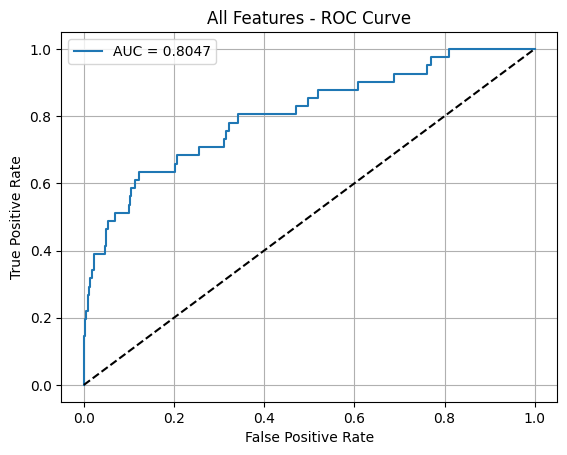

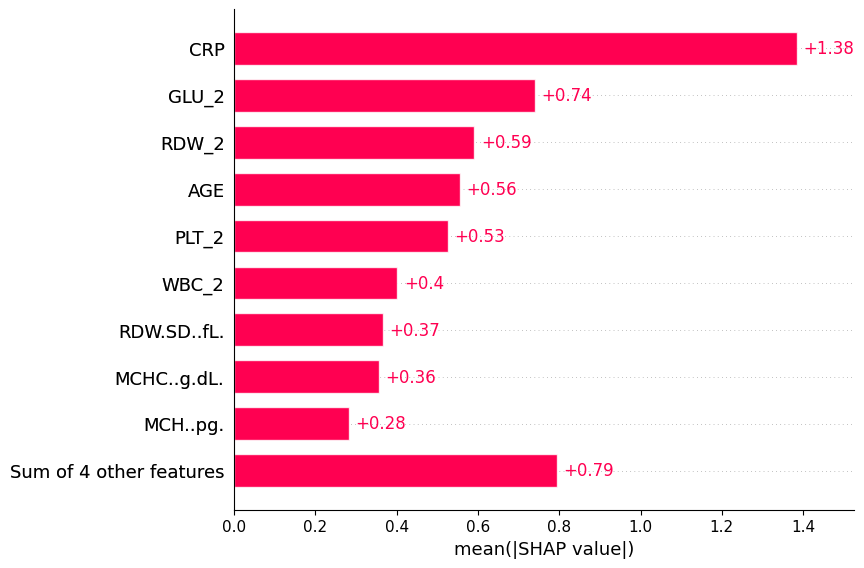

2b - three_featrues： ['CRP', 'GLU_2', 'RDW_2']

📊【2b - three_featrues】SMOTE 後訓練資料集類別分布：
has_bacteremia
0    1200
1     592
Name: count, dtype: int64

📊 2b - three_featrues 評估結果:
| 指標       | 數值   |
|------------|--------|
| Precision  | 0.2532 |
| Recall     | 0.4878 |
| F1-score   | 0.3333 |
| Accuracy   | 0.8287 |
| AUC        | 0.7878 |


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:21:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


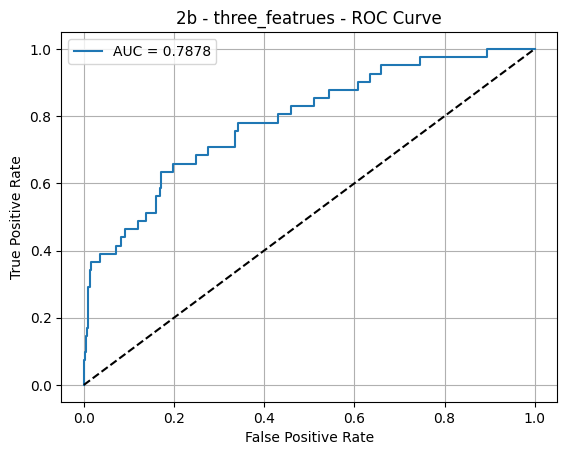

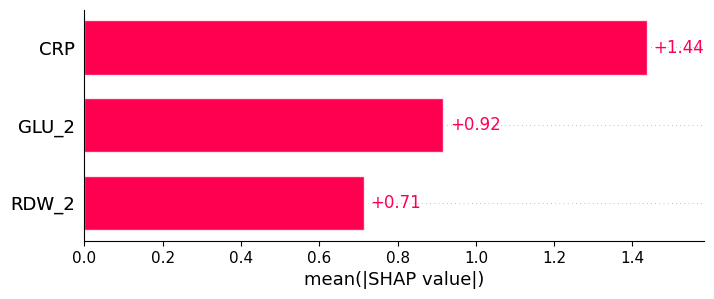

In [ ]:
from sklearn.utils import resample
def train_and_evaluate_smote_3(X_train, X_test, y_train, y_test, feature_cols, title=''):
    # SMOTE
       # 合併成一個 DataFrame
    train_df = pd.concat([X_train, y_train], axis=1)
    majority_class = y_train.value_counts().idxmax()
    minority_class = y_train.value_counts().idxmin()

    # 下採樣多數類別：只保留 200 筆
    df_majority = train_df[train_df['has_bacteremia'] == majority_class]
    df_minority = train_df[train_df['has_bacteremia'] == minority_class]

    df_majority_downsampled = resample(df_majority,replace=False,n_samples=1200,random_state=42)

    train_df_balanced = pd.concat([df_majority_downsampled, df_minority], axis=0)

    X_train = train_df_balanced[feature_cols]
    y_train = train_df_balanced['has_bacteremia']

    # 再進行 SMOTE：讓少數類別擴增到兩倍（最多 400）
    desired_ratio = 2 * y_train.value_counts().loc[minority_class] / y_train.value_counts().loc[majority_class]
    desired_ratio = min(desired_ratio, 1.0)  # 防止超過

    smote = SMOTE(sampling_strategy=desired_ratio, random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    print(f"\n📊【{title}】SMOTE 後訓練資料集類別分布：")
    print(y_train_res.value_counts())

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train_res[feature_cols], y_train_res)
    y_pred = model.predict(X_test[feature_cols])
    y_proba = model.predict_proba(X_test[feature_cols])[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"\n📊 {title} 評估結果:")
    print(f"| 指標       | 數值   |")
    print(f"|------------|--------|")
    print(f"| Precision  | {precision:.4f} |")
    print(f"| Recall     | {recall:.4f} |")
    print(f"| F1-score   | {f1:.4f} |")
    print(f"| Accuracy   | {accuracy:.4f} |")
    print(f"| AUC        | {auc:.4f} |")

    # ROC 曲線
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{title} - ROC Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # SHAP 分析
    explainer = shap.Explainer(model, X_test[feature_cols])
    shap_values = explainer(X_test[feature_cols])
    shap.plots.bar(shap_values, max_display=10)

    return model, shap_values

# === 4. 執行訓練與評估 ===
# from imblearn.over_sampling import SMOTE

# 準備特徵與標籤
X_train_smote = X_train[feature_cols]
y_train = X_train['has_bacteremia']
y_test = X_test['has_bacteremia']

# 菌血症預測（全部特徵）
model_3, shap_values = train_and_evaluate_smote_3(X_train_smote, X_test, y_train , y_test, feature_cols, title='All Features')

# 找出前3個重要特徵
shap_sum2 = np.abs(shap_values.values).mean(axis=0)
top3_idx2 = np.argsort(shap_sum2)[-3:][::-1]
top3_features_2b = [feature_cols[i] for i in top3_idx2]
print("2b - three_featrues：", top3_features_2b)

# 2b. 菌血症預測（三特徵）
model_2b, _ = train_and_evaluate_smote_3(X_train_smote, X_test, y_train, y_test, top3_features_2b, title='2b - three_featrues')



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (roc_auc_score, roc_curve, accuracy_score,
                             precision_score, recall_score, f1_score, confusion_matrix)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import shap

# === 4. Train and Evaluate Base Model ===
def evaluate_threshold(y_true, y_proba, threshold):
    y_pred = (y_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {
        'Threshold': threshold,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'Specificity': tn / (tn + fp),
        'F1-score': f1_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_proba)
    }

# 預測時也明確指定特徵
y_proba = model.predict_proba(X_test[feature_cols])[:, 1]
y_proba_1 = model_1.predict_proba(X_test[feature_cols])[:, 1]
y_proba_2 = model_2.predict_proba(X_test[feature_cols])[:, 1]
y_proba_3 = model_3.predict_proba(X_test[feature_cols])[:, 1]


def analyze_thresholds(y_test, y_proba, model_name):
    results = []
    for th in [0.3, 0.5, 0.7]:

        res = evaluate_threshold(y_test, y_proba, th)
        res['Model'] = model_name
        results.append(res)
    return pd.DataFrame(results)

# 合併所有模型結果
all_results = pd.concat([
    analyze_thresholds(y_test, y_proba, 'No SMOTE'),
    analyze_thresholds(y_test, y_proba_1, 'SMOTE (3980:3980)'),
    analyze_thresholds(y_test, y_proba_2, 'SMOTE (3980:592) '),
    analyze_thresholds(y_test, y_proba_3, 'SMOTE (1200:592)')
])

print("綜合評估結果：")
print(all_results)


綜合評估結果：
   Threshold  Accuracy  Precision    Recall  Specificity  F1-score       AUC  \
0        0.3  0.927195   0.652174  0.365854     0.981221  0.468750  0.836769   
1        0.5  0.931478   0.764706  0.317073     0.990610  0.448276  0.836769   
2        0.7  0.933619   0.916667  0.268293     0.997653  0.415094  0.836769   
0        0.3  0.882227   0.379310  0.536585     0.915493  0.444444  0.797893   
1        0.5  0.918630   0.538462  0.512195     0.957746  0.525000  0.797893   
2        0.7  0.933619   0.692308  0.439024     0.981221  0.537313  0.797893   
0        0.3  0.925054   0.607143  0.414634     0.974178  0.492754  0.829726   
1        0.5  0.929336   0.700000  0.341463     0.985915  0.459016  0.829726   
2        0.7  0.927195   0.769231  0.243902     0.992958  0.370370  0.829726   
0        0.3  0.856531   0.333333  0.634146     0.877934  0.436975  0.804706   
1        0.5  0.884368   0.381818  0.512195     0.920188  0.437500  0.804706   
2        0.7  0.907923   0.47058